In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('50_Startups.csv')

# Preprocessing Steps

In [3]:
data.shape

(50, 5)

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data = pd.get_dummies(data, columns= ['State'], prefix = 'state', drop_first= True)

In [5]:
nums = data.iloc[:,:4]

In [6]:
nums.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
Profit             50 non-null float64
state_Florida      50 non-null uint8
state_New York     50 non-null uint8
dtypes: float64(4), uint8(2)
memory usage: 1.8 KB


In [8]:
y = data.pop('Profit')

In [9]:
X = data

# Spliting the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Building the full model

In [11]:
lr = LinearRegression()

In [12]:
regressor = lr.fit(X_train, y_train)

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
y_pred

array([128960.56717265,  86255.41544354, 100167.08624753,  46968.40006588,
        68885.86127853,  97745.1941778 ,  97965.95791196,  68611.72722181,
        49340.45288627, 182427.07011395, 115605.65038372, 134072.82644913,
       125340.6913315 ])

# Evaluating the dataset

In [15]:
r2_score(y_pred, y_test)

0.9372516562110642

In [16]:
y_pred_train = regressor.predict(X_train)

In [17]:
r2_score(y_pred_train,y_train)

0.9487251256178458

# Assumptions of Linear Regression

In [ ]:
# Linearity of the variables 

In [114]:
import statsmodels.stats.api as sms
linearity = {}
for i in range(X.shape[1]):
    reg = sm.OLS(endog = y, exog = X[:,i]).fit()
    linearity[i] = sms.linear_harvey_collier(reg)

In [115]:
linearity 

{0: Ttest_1sampResult(statistic=-15.553505881271516, pvalue=6.092128249954745e-20),
 1: Ttest_1sampResult(statistic=-15.553505881271516, pvalue=6.092128249954745e-20),
 2: Ttest_1sampResult(statistic=-15.553505881271516, pvalue=6.092128249954745e-20),
 3: Ttest_1sampResult(statistic=8.508970942756708, pvalue=5.3155724728469836e-11),
 4: Ttest_1sampResult(statistic=-6.261322931703041, pvalue=1.1736501611002137e-07),
 5: Ttest_1sampResult(statistic=2.7655640338119594, pvalue=0.008152215813325824),
 6: Ttest_1sampResult(statistic=5.712099554370865, pvalue=7.805004373975918e-07),
 7: Ttest_1sampResult(statistic=5.17783094108865, pvalue=4.828535341414761e-06)}

In [170]:
feature_names = data.columns.tolist()

In [186]:
vifs = {}
for i in range(X.shape[1]):
    rsq = sm.OLS(endog = y, exog = X[:,i]).fit().rsquared
    vif = round(1/(1-rsq))
    vifs[feature_names[i]] = vif

In [187]:
vifs

{'R&D Spend': 19.0,
 'Administration': 8.0,
 'Marketing Spend': 9.0,
 'state_Florida': 1.0,
 'state_New York': 1.0}

In [188]:
# Variance of dependent variables needs to be positive

In [192]:
variance = {}
for i in data.columns.tolist():
    variance[i] = (data[i].std())**2

In [193]:
variance

{'R&D Spend': 2107017150.1675436,
 'Administration': 784997271.2454692,
 'Marketing Spend': 14954920097.42379,
 'state_Florida': 0.22204081632653058,
 'state_New York': 0.2289795918367346}

#### Durbin watson test

In [204]:
# Normal disribution of residuals

Text(0.5, 1.0, 'Residial plot')

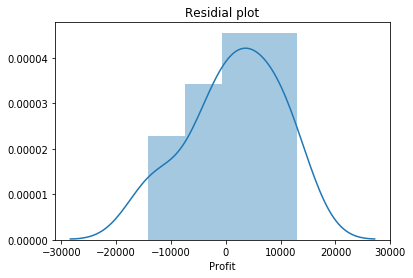

In [207]:
sns.distplot(residuals)
plt.title("Residial plot")

In [208]:
# One more way to check the data is normally distributed, In a bell curve
# the mean=median=mode thus zero skew or very very less skew

In [209]:
pd.DataFrame(resduals).skew()

Profit   -0.549849
dtype: float64

In [210]:
# Normally Disributed

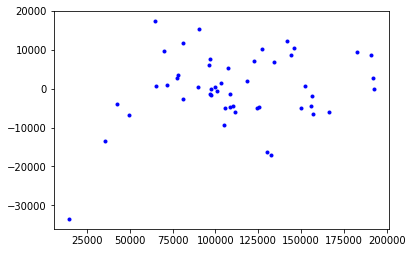

In [244]:
plt.plot(y, reg.resid, 'b.')
plt.show()

In [246]:
# Let's look for a statistical backing, because graphs are from Laymen.

In [216]:
import statsmodels.stats.diagnostic as ssd

In [238]:
lm, l_pvalue, f_statistic, f_pvalue = ssd.het_breuschpagan(reg.resid, X)

In [240]:
print(f_pvalue)

0.059826483895680016


In [241]:
# With high p values we regest the null hypothesis, the data is hetroskedastic